<a href="https://colab.research.google.com/github/Aras1703/CNN-Covid19_Image_Recognition/blob/main/Covid_19_Image_Lung_Classification_using_CNN_(Tensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import zipfile, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
import shutil
!pip install split-folders
import splitfolders

In [ ]:
drive.mount('/content/drive/')

local_zip = '/content/drive/My Drive/Data image/Covid X-ray.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Mounted at /content/drive/


In [ ]:
base_dir = '/tmp/CovidDataset'

In [ ]:
os.listdir(base_dir)

['Train', 'Test', 'Val']

In [ ]:
TRAIN_PATH = "/tmp/CovidDataset/Train"
VAL_PATH = "/tmp/CovidDataset/Val"
TEST_PATH = "/tmp/CovidDataset/Test"

In [ ]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                zoom_range=0.2,
                shear_range = 0.2,
                validation_split=0.4
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        TRAIN_PATH,
        target_size=(220, 220),
        batch_size=8,
        class_mode='binary',
        subset='training'
) 

Found 188 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
        VAL_PATH,
        target_size=(220, 220),
        batch_size=8,
        class_mode='binary',
        subset='validation'
)

Found 16 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=15,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=2)

Epoch 1/15
15/15 [==============================] - 20s 1s/step - loss: 0.9318 - accuracy: 0.5917 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 2/15
15/15 [==============================] - 18s 1s/step - loss: 0.6798 - accuracy: 0.6379 - val_loss: 0.6334 - val_accuracy: 0.5000
Epoch 3/15
15/15 [==============================] - 18s 1s/step - loss: 0.6501 - accuracy: 0.6083 - val_loss: 0.5564 - val_accuracy: 0.7500
Epoch 4/15
15/15 [==============================] - 18s 1s/step - loss: 0.3637 - accuracy: 0.9052 - val_loss: 0.6013 - val_accuracy: 0.6250
Epoch 5/15
15/15 [==============================] - 17s 1s/step - loss: 0.5943 - accuracy: 0.7931 - val_loss: 0.4378 - val_accuracy: 0.8125
Epoch 6/15
15/15 [==============================] - 18s 1s/step - loss: 0.2694 - accuracy: 0.9083 - val_loss: 0.4405 - val_accuracy: 0.8125
Epoch 7/15
15/15 [==============================] - 18s 1s/step - loss: 0.1943 - accuracy: 0.9224 - val_loss: 0.2221 - val_accuracy: 0.8750
Epoch 8/15
15/15 [==

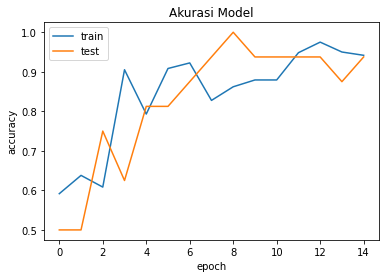

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

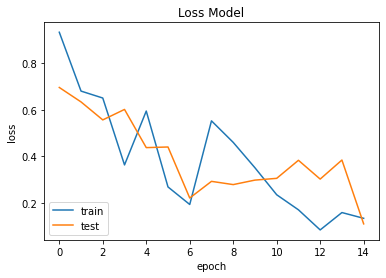

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

Saving NORMAL2-IM-1094-0001-0002.jpeg to NORMAL2-IM-1094-0001-0002.jpeg
NORMAL2-IM-1094-0001-0002.jpeg
normal


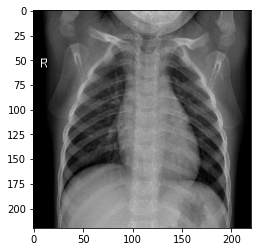

In [ ]:
import numpy as np
from keras.preprocessing import image
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(220,220))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  
  print(fn)
  if classes[0]==1:
    print('normal')
  elif classes[0]==0:
    print('covid')
  else:
    print('unknown')